In [14]:
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 16 10:23:01 2017
Practical work on wavelet denoising
@author: cagnazzo
"""

#%% Modules
import numpy as np
import pywt
import wtTools as wtt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import sure

# Q1

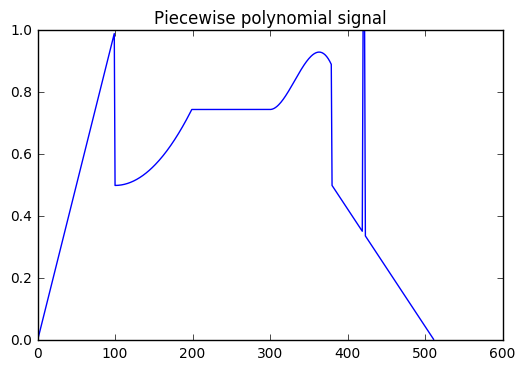

([<matplotlib.lines.Line2D at 0x1efcf740630>],
 None)

In [3]:
#%% Q1:Create a piecewise polynomial signal 
  
x=np.zeros(512)
N1 = 100
N2 = 200
N3 = 300
N4 = 380
N5 = 512


r1 = np.arange(0,N1)
r2 = np.arange(N1,N2)
r3 = np.arange(N2,N3)
r4 = np.arange(N3,N4)
r5 = np.arange(N4,N5)

x[r1] = r1/float(N1)
x[r2] =0.5+ ((r2-float(N1))/float(N2))**2
x[r3] = x[N2-1]
t4 = (r4-float(N3))/float(N4)
x[r4] = -80*t4**3 + 20*t4**2 + x[N2-1] #3 orders
x[r5] = 0.5*(1-(r5-float(N4))/(float(N5-N4)))
x[420:423] =1
plt.plot(x), plt.title('Piecewise polynomial signal')    , plt.show()

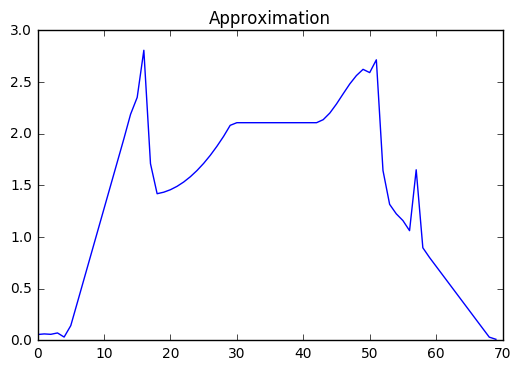

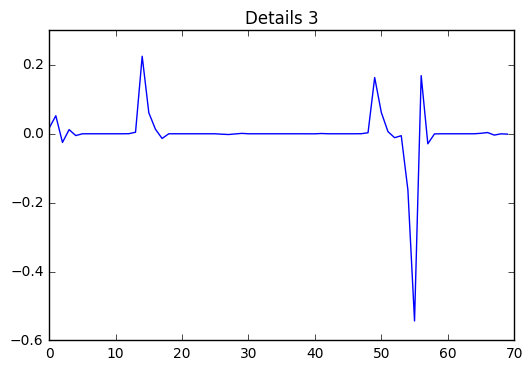

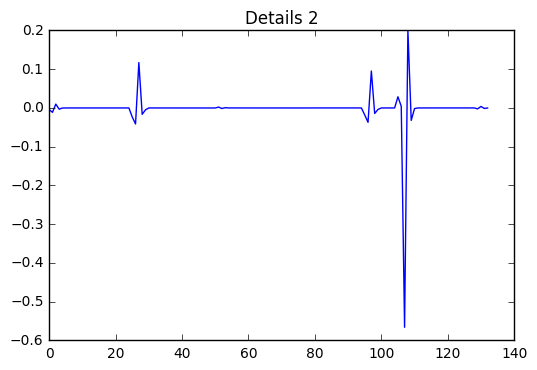

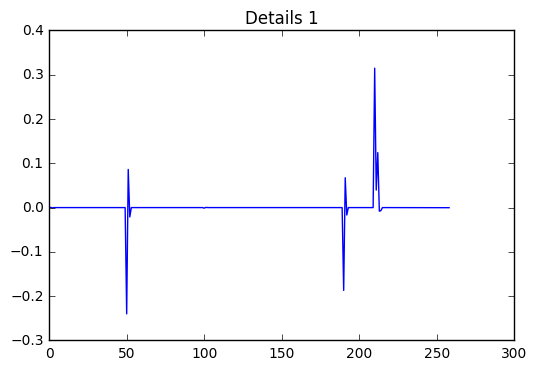

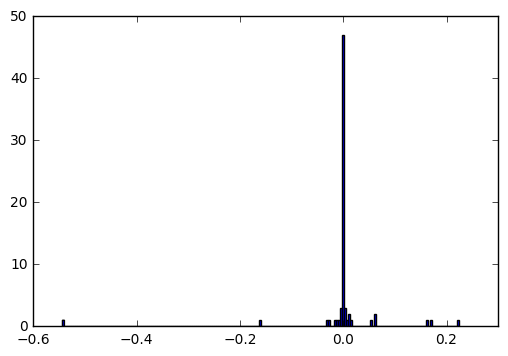

In [4]:
#%% Q2 3 4 5: Compute and show the DWT
w = pywt.Wavelet('db4') #Daubechies avec 4 moments nuls
# Ordered list of coefficients arrays where n denotes the level of decomposition.
# The first element (cA_n) of the result is approximation coefficients array
# and the following elements (cD_n - cD_1) are details coefficients arrays.
cA3, cD3, cD2, cD1 = pywt.wavedec(x, w, level=3)
plt.title('Approximation'), plt.plot(cA3), plt.grid, plt.show(),
plt.title('Details 3'), plt.plot(cD3), plt.show(),
plt.title('Details 2'), plt.plot(cD2), plt.show(),
plt.title('Details 1'), plt.plot(cD1), plt.show(),

plt.hist(cD3,200)
plt.show()

# Q2

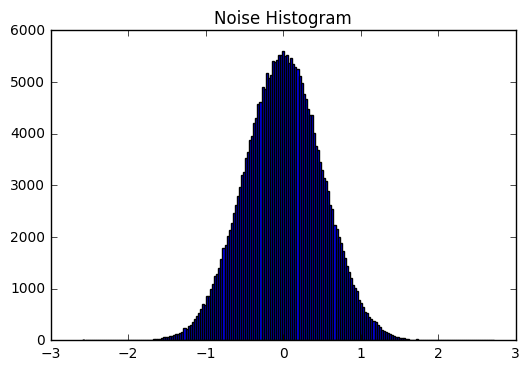

Sample STD  0.50


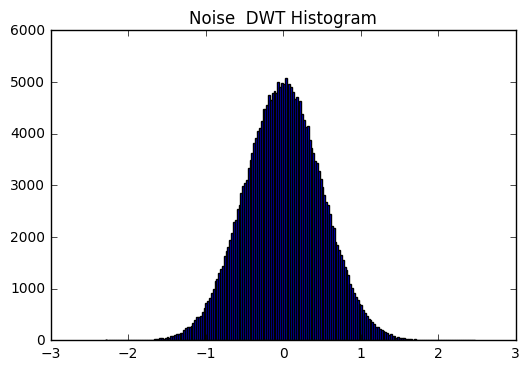

DWT coeff  STD  0.50


In [8]:
#%% Q2.1 2.2 2.3 Noise characteristics
largeN =  2**18
sigma = .5
noiseSamples =  np.random.normal(0, sigma, largeN) # Generate largeN samples iid from N(sigma^2, 0 ) distribution
plt.hist(noiseSamples,200)
plt.title('Noise Histogram'), plt.show()
print ('Sample STD %5.2f'%  noiseSamples.std())#

nLevel = 3
noiseWT = pywt.wavedec(noiseSamples, w, mode='per', level=nLevel)
noiseWTarray = np.zeros_like(noiseSamples)
start=0
for idxLevel in range (nLevel+1):
    size =  len(noiseWT[idxLevel])
    noiseWTarray[start:start+size] = noiseWT[idxLevel]
    start = size+start
plt.hist(noiseWTarray,200)
plt.title('Noise  DWT Histogram'), plt.show()
print ('DWT coeff  STD %5.2f'%  noiseWTarray.std())

# Q3

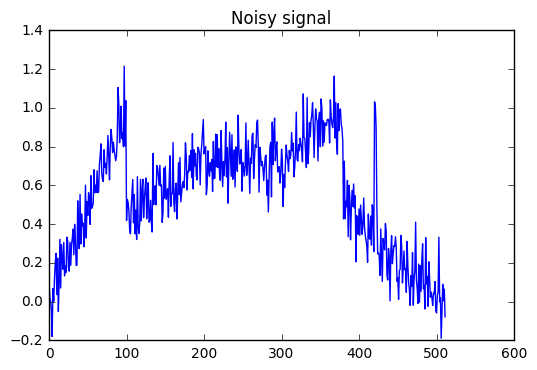

SNR: 15.68 dB


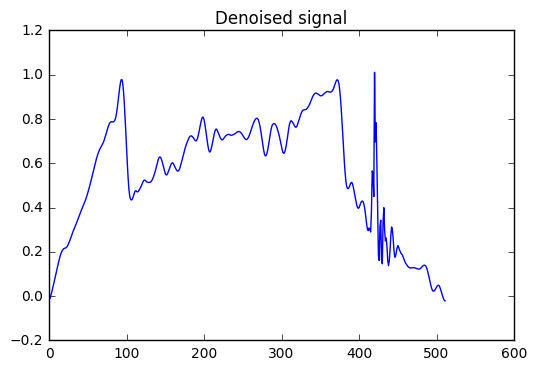

SNR: 21.88 dB
SNR sousbande: [ 20.44315352  25.36204396  22.21601323  23.92863359] dB


C:\Users\Win7-Wei\Desktop\travaux pratiques\SD205 TP2\wtTools.py:179: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sb = arr[T:2*T]
C:\Users\Win7-Wei\Desktop\travaux pratiques\SD205 TP2\wtTools.py:180: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  error = sb - arrN[T:2*T]
C:\Users\Win7-Wei\Desktop\travaux pratiques\SD205 TP2\wtTools.py:188: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sb = arr[0:T]
C:\Users\Win7-Wei\Desktop\travaux pratiques\SD205 TP2\wtTools.py:189: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  error = sb - arrN[0:T]


In [69]:
#%% Q3.1 Add noise to the 1-D signal
sigma = .1
noise = sigma*np.random.randn(x.size)
y =  x + noise
plt.title('Noisy signal'), plt.plot(y), plt.show()
print ("SNR: %5.2f dB"%  wtt.sbSNR(x,y))

#%% Denoising with universal threshold 

nLevel = 3
thr  = sigma * np.sqrt(2 * np.log( x.size*(1-2**(-nLevel)) ))
coeffs = pywt.wavedec(y, w, mode='per', level=nLevel)#小波变换得到小波系数
coeffsT = wtt.coeff1Dthresh(coeffs, thr)#对小波系数做threshold处理
xhat   = pywt.waverec(coeffsT, w, mode='per')#对处理后小波系数重建信号
plt.title('Denoised signal'), plt.plot(xhat), plt.show()
print ("SNR: %5.2f dB"%  wtt.sbSNR(x,xhat) )
print ("SNR sousbande:",  wtt.sbSNR(x,xhat,3), "dB" )

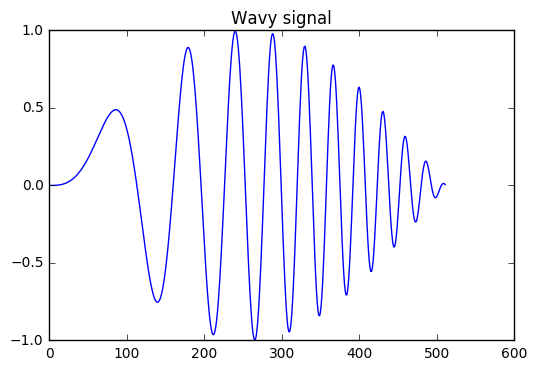

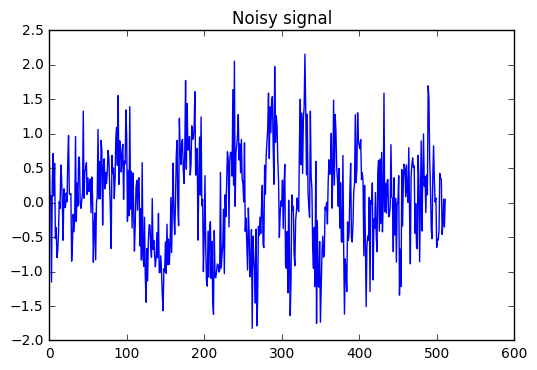

SNR: -0.06 dB


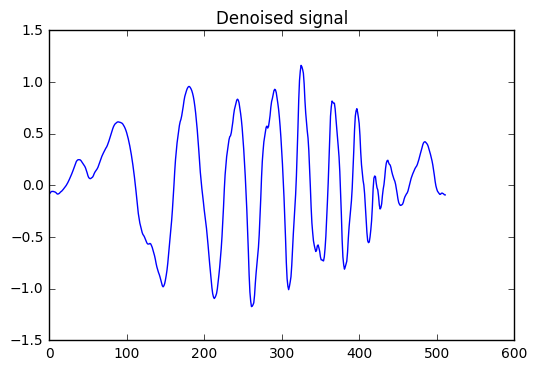

SNR Hard, univ:  7.35 dB


In [18]:
#% Q3.2 3.3 Wavy signal
N = 512.
r1 = np.arange(0,N)
omega = r1/N/50
x  = np.sin(np.pi*r1/N) * np.sin(2*np.pi*omega*r1)
plt.plot(r1,x), plt.title('Wavy signal'), plt.show()
#  Add noise to the 1-D signal
sigma = 0.5
noise = sigma*np.random.randn(x.size)
y =  x + noise
plt.title('Noisy signal'), plt.plot(y), plt.show()
print ("SNR: %5.2f dB"%  wtt.sbSNR(x,y) )

#%% Universal threshold , hard thresholding
nLevel = 4
thr  = sigma * np.sqrt(2 * np.log( x.size*(1-2**(-nLevel)) ))
coeffs = pywt.wavedec(y, w, mode='per', level=nLevel)
coeffsT = wtt.coeff1Dthresh(coeffs, thr)
xhat   = pywt.waverec(coeffsT, w, mode='per')
plt.title('Denoised signal'), plt.plot(xhat), plt.show()
print ("SNR Hard, univ: %5.2f dB"% wtt.sbSNR(x,xhat))

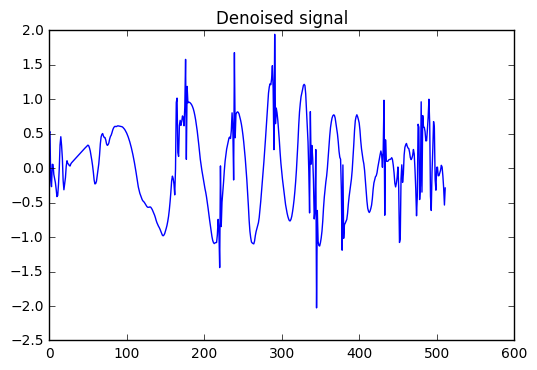

SNR: Hard, Minimax  5.05 dB


In [19]:
#%% Q3.4 3.5 3.6 Minimax threshold , hard thresholding
thrMinimax = sigma*wtt.miniMax(x.size *(1- 2 **(-nLevel)))
coeffs = pywt.wavedec(y, w, mode='per', level=nLevel)
coeffsS = wtt.coeff1Dthresh(coeffs, thrMinimax)
xhat   = pywt.waverec(coeffsS, w, mode='per')
plt.title('Denoised signal'), plt.plot(xhat), plt.show()
print ("SNR: Hard, Minimax %5.2f dB"%  wtt.sbSNR(x,xhat) )

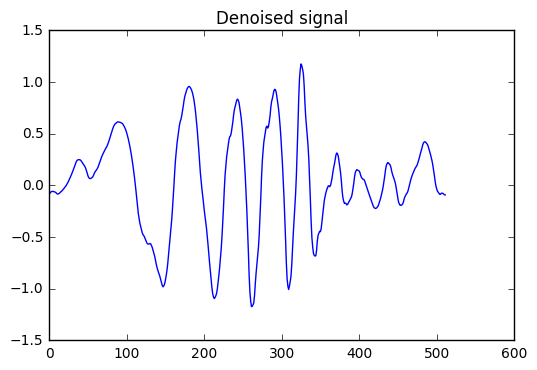

SNR Soft, Univ:  6.15 dB


In [20]:
#%% universal threshold , soft thresholding
nLevel = 4
thr  = sigma * np.sqrt(2 * np.log( x.size*(1-2**(-nLevel)) ))
coeffs = pywt.wavedec(y, w, mode='per', level=nLevel)
coeffsS = wtt.coeff1Dthresh(coeffs, thr, mode='soft')
xhat   = pywt.waverec(coeffsS, w, mode='per')
plt.title('Denoised signal'), plt.plot(xhat), plt.show()
print ("SNR Soft, Univ: %5.2f dB"%  wtt.sbSNR(x,xhat) )

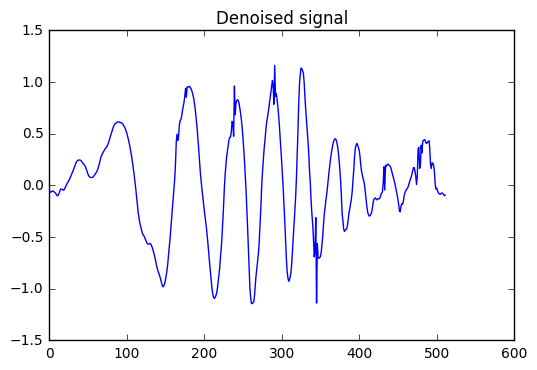

SNR Soft, Minimax:  7.66 dB


In [21]:
#%% Minimax threshold , soft thresholding
thrMinimax = sigma*wtt.miniMax(x.size *(1- 2 **(-nLevel)), )
coeffs = pywt.wavedec(y, w, mode='per', level=nLevel)
coeffsS = wtt.coeff1Dthresh(coeffs, thrMinimax, 'soft')
xhat   = pywt.waverec(coeffsS, w, mode='per')
plt.title('Denoised signal'), plt.plot(xhat), plt.show()
print ("SNR Soft, Minimax: %5.2f dB"%  wtt.sbSNR(x,xhat) )

# Q4

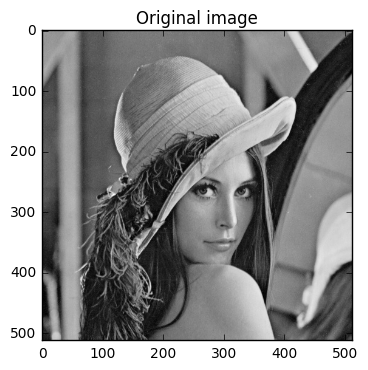

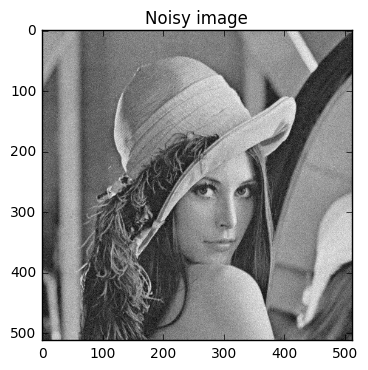

In [3]:
#%% Q4.1 Read an image and add noise
img = mpimg.imread('lena.jpg')
rows,cols = np.shape(img)
sigma = 10 
noise = sigma*np.random.randn(rows,cols)
noisyImg = np.float64(img)+noise
noisySNR = wtt.sbSNR(img,noisyImg)  


#%% Show original and noisy images
plt.imshow(img)
plt.set_cmap('gray')
plt.title('Original image')
plt.show()

plt.imshow(np.uint8(np.clip(noisyImg,0,255)))
plt.set_cmap('gray')
plt.title('Noisy image')
plt.show()

C:\Users\Win7-Wei\Desktop\travaux pratiques\SD205 TP2\wtTools.py:39: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sb = abs(arr[0:rows,cols:2*cols])
C:\Users\Win7-Wei\Desktop\travaux pratiques\SD205 TP2\wtTools.py:45: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  scaled_wt[0:rows,cols:2*cols]= 1- (sb-mm)/(MM-mm)
C:\Users\Win7-Wei\Desktop\travaux pratiques\SD205 TP2\wtTools.py:48: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sb = abs(arr[rows:2*rows,0:cols])
C:\Users\Win7-Wei\Desktop\travaux pratiques\SD205 TP2\wtTools.py:55: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  scaled_wt[rows:2*rows,0:cols]= 1- (sb-mm)/(MM-mm)
C:\Users\Win7-Wei\Desktop\travaux pratiques\SD205 TP2\wtTools.py:58: VisibleDeprecationWarni

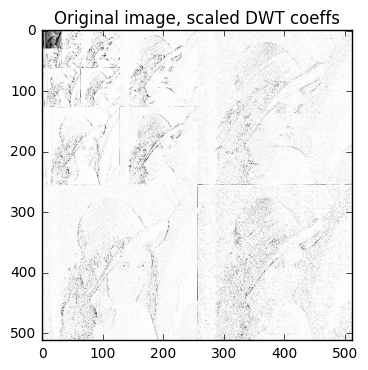

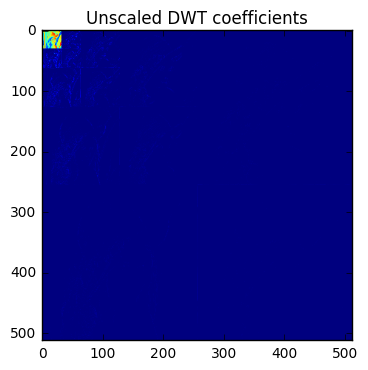

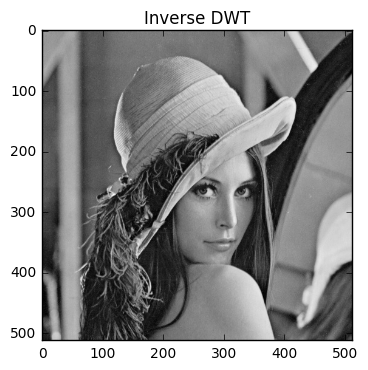

(<matplotlib.text.Text at 0x210e31a3d30>, None, None)

In [4]:
# Q4.2 4.3 4.4 4.5
#%% Forward  DWT
wav = 'db3'
NLEV  = 4
filter_bank = pywt.Wavelet(wav)
coeffs = pywt.wavedec2(img, filter_bank, mode='per', level=NLEV)
arr = wtt.coeffs_to_array(coeffs)

# difference between wtview and imshow?
wtt.wtView(coeffs, 'Original image, scaled DWT coeffs')
plt.imshow(np.abs(arr/arr.max()))
plt.set_cmap('jet')
plt.title('Unscaled DWT coefficients')
plt.show()

#%% Inverse DWT
decoded = pywt.waverec2(coeffs, filter_bank, mode='per')
plt.imshow(np.uint8(decoded))
plt.title('Inverse DWT') ,  plt.set_cmap('gray'), plt.show()

C:\Users\Win7-Wei\Desktop\travaux pratiques\SD205 TP2\wtTools.py:39: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sb = abs(arr[0:rows,cols:2*cols])
C:\Users\Win7-Wei\Desktop\travaux pratiques\SD205 TP2\wtTools.py:45: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  scaled_wt[0:rows,cols:2*cols]= 1- (sb-mm)/(MM-mm)
C:\Users\Win7-Wei\Desktop\travaux pratiques\SD205 TP2\wtTools.py:48: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sb = abs(arr[rows:2*rows,0:cols])
C:\Users\Win7-Wei\Desktop\travaux pratiques\SD205 TP2\wtTools.py:55: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  scaled_wt[rows:2*rows,0:cols]= 1- (sb-mm)/(MM-mm)
C:\Users\Win7-Wei\Desktop\travaux pratiques\SD205 TP2\wtTools.py:58: VisibleDeprecationWarni

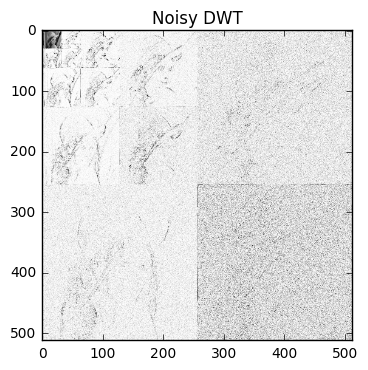

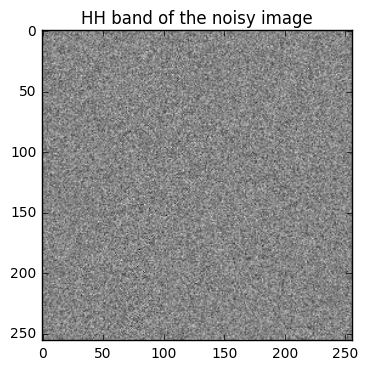

STD estimation: 10.45

True STD: 10.00



In [8]:
# Q4.7
#%% DWT of noisy image
coeffsN = pywt.wavedec2(noisyImg, filter_bank, mode='per', level=NLEV)
arrN = wtt.coeffs_to_array(coeffsN)
wtt.wtView(coeffsN,'Noisy DWT')
# SNR = wtt.sbSNR(arr,arrN,NLEV,1)

#%% Noise estimation
HH= coeffsN[NLEV][2]
# arrN[]

plt.imshow((HH-HH.min())/(HH.max()-HH.min()))
plt.title('HH band of the noisy image')
plt.show() 
sigmaHat=np.median(np.abs(HH))/0.67449 #中位值估计
print ("STD estimation: %5.2f\n" % sigmaHat)
print ("True STD: %5.2f\n" % sigma)

# Q5

C:\Users\Win7-Wei\Desktop\travaux pratiques\SD205 TP2\wtTools.py:39: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sb = abs(arr[0:rows,cols:2*cols])
C:\Users\Win7-Wei\Desktop\travaux pratiques\SD205 TP2\wtTools.py:45: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  scaled_wt[0:rows,cols:2*cols]= 1- (sb-mm)/(MM-mm)
C:\Users\Win7-Wei\Desktop\travaux pratiques\SD205 TP2\wtTools.py:48: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sb = abs(arr[rows:2*rows,0:cols])
C:\Users\Win7-Wei\Desktop\travaux pratiques\SD205 TP2\wtTools.py:55: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  scaled_wt[rows:2*rows,0:cols]= 1- (sb-mm)/(MM-mm)
C:\Users\Win7-Wei\Desktop\travaux pratiques\SD205 TP2\wtTools.py:58: VisibleDeprecationWarni

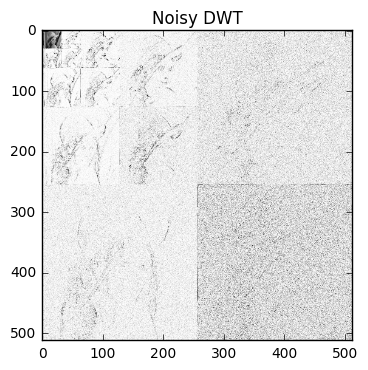

Processing level 0
SNR LH -5.63 dB
SNR HL -1.64 dB
SNR HH -9.52 dB
Processing level 1
SNR LH  3.37 dB
SNR HL  7.47 dB
SNR HH  1.02 dB
Processing level 2
SNR LH 11.95 dB
SNR HL 16.89 dB
SNR HH 10.70 dB
Processing level 3
SNR LH 20.16 dB
SNR HL 25.42 dB
SNR HH 18.58 dB
Processing approximation
SNR LL 46.50 dB
Processing approximation
SNR LL 22.45 dB
Processing approximation
SNR LL 22.45 dB


C:\Users\Win7-Wei\Desktop\travaux pratiques\SD205 TP2\wtTools.py:133: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sb = arr[0:rows,cols:2*cols]
C:\Users\Win7-Wei\Desktop\travaux pratiques\SD205 TP2\wtTools.py:134: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  error = sb - arrN[0:rows,cols:2*cols]
C:\Users\Win7-Wei\Desktop\travaux pratiques\SD205 TP2\wtTools.py:143: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sb = arr[rows:2*rows,0:cols]
C:\Users\Win7-Wei\Desktop\travaux pratiques\SD205 TP2\wtTools.py:144: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  error = sb - arrN[rows:2*rows,0:cols]
C:\Users\Win7-Wei\Desktop\travaux pratiques\SD205 TP2\wtTools.py:154: VisibleDeprecationWarning: using a non-integer numbe

In [6]:
# Q5.1 5.2
#%% DWT of noisy image
coeffsN = pywt.wavedec2(noisyImg, filter_bank, mode='per', level=NLEV)
arrN = wtt.coeffs_to_array(coeffsN)
wtt.wtView(coeffsN,'Noisy DWT')
SNR = wtt.sbSNR(arr,arrN,NLEV,1)
SNR0 = wtt.sbSNR(arr,arrN,0,1)
SNRimg = wtt.sbSNR(img,noisyImg,0,1)

c:\program files\python35\lib\site-packages\ipykernel\__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Win7-Wei\Desktop\travaux pratiques\SD205 TP2\wtTools.py:267: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  coeffs.append( arr[0:rows,0:cols] )
C:\Users\Win7-Wei\Desktop\travaux pratiques\SD205 TP2\wtTools.py:278: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  lev.append(arr[0:rows,cols:2*cols] )
C:\Users\Win7-Wei\Desktop\travaux pratiques\SD205 TP2\wtTools.py:279: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  lev.append(arr[rows:2*rows,0:cols])
C:\Users\Win7-Wei\Desktop\travaux pratiques\SD205 TP2\wtTools.py:280: VisibleDeprecationWarning: using a non-integer number instead of an integer wil

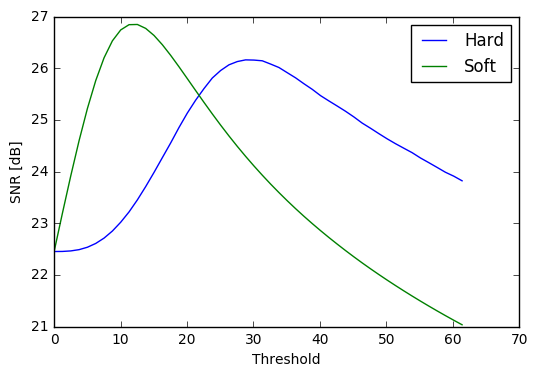

Estimated noise std 10.45
Noisy image SNR 22.45 dB
Denoising with wavelet db3   Levels= 4
Max SNR Soft 26.85 dB for th= 12
Max SNR Hard 26.16 dB for th= 28


In [9]:
# Q5.3
#%% Asymptotic thresdhold
visu = sigmaHat * np.sqrt(2*np.log(img.size))

#%% Denoising performance bounds (knowing the ground truth)

#%% Hard thresholding
values  = np.arange(0,visu*1.2,visu*1.2/50)
SNR_hard =np.zeros_like(values,dtype='float')
for ind,thrsh in enumerate(values): 
    arrT=pywt.threshold(arrN,thrsh,mode='hard')
    arrT[rows/(2**NLEV),cols/(2**NLEV)]= arrN[rows/(2**NLEV),cols/(2**NLEV)] #  LL  is not thresholded
    co2 = wtt.array_to_coeffs(arrT,NLEV)
    denoised = pywt.waverec2(co2, filter_bank, mode='per')
    SNR_hard[ind] = wtt.sbSNR(img,denoised,0,0)
#     print  (thrsh, "SNR %5.2f"% SNR_hard[ind])
    
#%% Soft thresholding
values  = values  = np.arange(0,visu*1.2,visu*1.2/50)
SNR_soft =np.zeros_like(values,dtype='float')
for ind,thrsh in enumerate(values): 
    arrT=pywt.threshold(arrN,thrsh,mode='soft')
    arrT[rows/(2**NLEV),cols/(2**NLEV)]= arrN[rows/(2**NLEV),cols/(2**NLEV)]
    co2 = wtt.array_to_coeffs(arrT,NLEV)
    denoised = pywt.waverec2(co2, filter_bank, mode='per')
    SNR_soft[ind] = wtt.sbSNR(img,denoised,0,0)
#     print  (thrsh, "SNR %5.2f"% SNR_soft[ind] )
    
#%% Show reults
plt.plot(values,SNR_hard,label='Hard')
plt.plot(values,SNR_soft,label='Soft')
plt.legend()
plt.ylabel('SNR [dB]')
plt.xlabel('Threshold')
plt.show()
#%%
print ('Estimated noise std %5.2f' % sigmaHat)
print ('Noisy image SNR %5.2f dB' % noisySNR)

print ('Denoising with wavelet %s ' % wav, ' Levels=%2d' % NLEV)
print ('Max SNR Soft %5.2f' % SNR_soft.max(),  'dB for th=%3d' % values[SNR_soft.argmax()])
print ('Max SNR Hard %5.2f' % SNR_hard.max(),  'dB for th=%3d' % values[SNR_hard.argmax()])

Universal threshold: 52.17
Universal threshold Soft SNR 21.72


c:\program files\python35\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Win7-Wei\Desktop\travaux pratiques\SD205 TP2\wtTools.py:267: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  coeffs.append( arr[0:rows,0:cols] )
C:\Users\Win7-Wei\Desktop\travaux pratiques\SD205 TP2\wtTools.py:278: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  lev.append(arr[0:rows,cols:2*cols] )
C:\Users\Win7-Wei\Desktop\travaux pratiques\SD205 TP2\wtTools.py:279: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  lev.append(arr[rows:2*rows,0:cols])
C:\Users\Win7-Wei\Desktop\travaux pratiques\SD205 TP2\wtTools.py:280: VisibleDeprecationWarning: using a non-integer number instead of an integer will

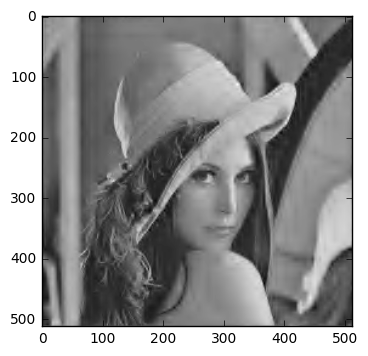

c:\program files\python35\lib\site-packages\ipykernel\__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Universal threshold Hard SNR 24.47


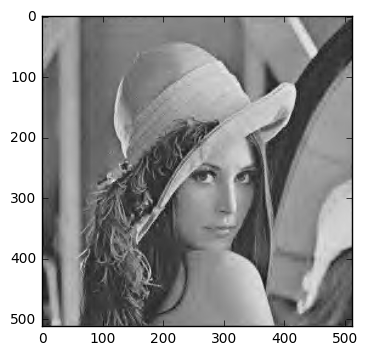

Minimax threshold: 36.78


c:\program files\python35\lib\site-packages\ipykernel\__main__.py:23: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


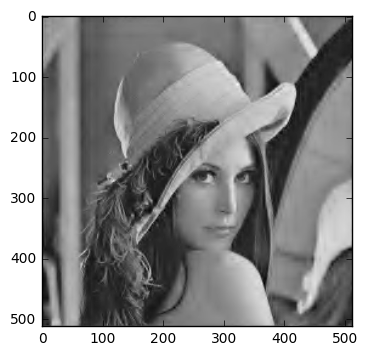

Minimax Soft SNR 23.23
Minimax Hard SNR 25.74


c:\program files\python35\lib\site-packages\ipykernel\__main__.py:30: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


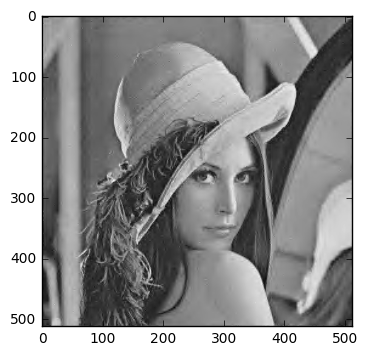

In [43]:
#%%  Universal threshold
thrsh =sigmaHat * np.sqrt(2*np.log(img.size))
print ('Universal threshold: %5.2f'%  thrsh)
arrT=pywt.threshold(arrN,thrsh,mode='soft')
arrT[rows/(2**NLEV),cols/(2**NLEV)]= arrN[rows/(2**NLEV),cols/(2**NLEV)]
co2 = wtt.array_to_coeffs(arrT,NLEV)
denoised = pywt.waverec2(co2, filter_bank, mode='per')
print ('Universal threshold Soft SNR %5.2f' % wtt.sbSNR(img,denoised))
plt.imshow(denoised)
plt.show()
arrT=pywt.threshold(arrN,thrsh,mode='hard')
arrT[rows/(2**NLEV),cols/(2**NLEV)]= arrN[rows/(2**NLEV),cols/(2**NLEV)]
co2 = wtt.array_to_coeffs(arrT,NLEV)
denoised = pywt.waverec2(co2, filter_bank, mode='per')
print ('Universal threshold Hard SNR %5.2f' % wtt.sbSNR(img,denoised))
plt.imshow(denoised)
plt.show()

#%% Minimax
thrsh = sigmaHat *  wtt.miniMax(img.size) 
print ('Minimax threshold: %5.2f'%  thrsh)
arrT=pywt.threshold(arrN,thrsh,mode='soft')
arrT[rows/(2**NLEV),cols/(2**NLEV)]= arrN[rows/(2**NLEV),cols/(2**NLEV)]
co2 = wtt.array_to_coeffs(arrT,NLEV)
denoised = pywt.waverec2(co2, filter_bank, mode='per')
plt.imshow(denoised)
plt.show()
print ('Minimax Soft SNR %5.2f' % wtt.sbSNR(img,denoised))
arrT=pywt.threshold(arrN,thrsh,mode='hard')
arrT[rows/(2**NLEV),cols/(2**NLEV)]= arrN[rows/(2**NLEV),cols/(2**NLEV)]
co2 = wtt.array_to_coeffs(arrT,NLEV)
denoised = pywt.waverec2(co2, filter_bank, mode='per')
print ('Minimax Hard SNR %5.2f' % wtt.sbSNR(img,denoised))
plt.imshow(denoised)
plt.show()

In [15]:
#%% SURE

arrT= sure.hybridDenoise(arrN,sigmaHat,NLEV) 
co2 = wtt.array_to_coeffs(arrT,NLEV)
denoised = pywt.waverec2(co2, filter_bank, mode='per')
print ('SURE SNR %5.2f' % wtt.sbSNR(img,denoised))
plt.imshow(denoised)
plt.show()

NameError: name 'np' is not defined

In [69]:
#%% Wiener 
y = noisyImg
Y = np.fft.fft2(y-y.mean())
S = Y*np.conjugate(Y) / Y.size

H = np.real( (S-sigmaHat**2)/(S+1e-14))
H =H*(H>0)
X = H*Y
denoised =np.real(np.fft.ifft2(X))+y.mean()
print ('Wiener SNR %5.2f' % wtt.sbSNR(img,denoised))
plt.imshow(H)
plt.imshow(Y)
plt.imshow(x)
plt.figure()
plt.imshow(denoised)
plt.show()

Wiener SNR 25.67


TypeError: Image data can not convert to float

In [67]:
#%% Undecimanted WT


R,C = noisyImg.shape
acc = np.zeros_like(noisyImg,dtype='float')
shifts =  5 #2**NLEV
print ('---- shifts %dx%d' % (shifts,shifts))
for dx in range(shifts+1):
    for dy in range(shifts+1):
        #print dx, dy
        RR = np.mod(np.arange(R) +dx,R)
        CC = np.mod(np.arange(C) +dy,C)
        tmp =  noisyImg[np.meshgrid(RR, CC)]
        coeffsN = pywt.wavedec2(tmp, filter_bank, mode='per', level=NLEV)
        arrN = wtt.coeffs_to_array(coeffsN)
        arrT= sure.hybridDenoise(arrN,sigmaHat,NLEV) 
        co2 = wtt.array_to_coeffs(arrT,NLEV)
        denoised = pywt.waverec2(co2, filter_bank, mode='per')

        RR = np.mod(np.arange(R) +R-dx,R)
        CC = np.mod(np.arange(C) +C-dy,C)
        den =  denoised[np.meshgrid(CC, RR)]         
        
        acc = acc+ den/((shifts+1)**2)

print ('UDWT SNR %5.2f' % wtt.sbSNR(img,acc))
plt.imshow(acc)
plt.show()  

---- shifts 5x5


C:\Users\Win7-Wei\Desktop\travaux pratiques\SD205 TP2\sure.py:54: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sb = arr[0:rows,cols:2*cols]


AttributeError: module 'pywt' has no attribute 'thresholding'

In [73]:
# np.random.normal(0, 0.5**2, 10)
# noiseWT[0].
# len(coeffsN)
# coeffsN[0].shape
# SNR_hard
# values
arrN.shape
rows
a=np.array([1,-1,2])
a*(a>0)

array([1, 0, 2])